# Spam Classification Using Bayesian Model

## Problem Statement ##
Spam emails are a major challenge in digital communication. This project aims to build a Bayesian classifier to detect spam emails efficiently. The classifier will be trained on a dataset containing labeled spam and non-spam messages. The goal is to optimize accuracy while minimizing false positives and false negatives.


## Algorithm of the Solution
The project follows these key steps:

1. Data Setup and Exploration: Load and inspect the dataset.

2. Preparing Training and Testing Sets: Preprocess data, including tokenization and vectorization.

3. Build the Bayesian Model: Train a Naïve Bayes classifier.

4. Improve the Model: Tune hyperparameters and preprocess features.

5. Output Interpretation: Evaluate the model's predictions.

6. Estimate Errors: Calculate accuracy, precision, recall, and F1-score.

7. Make Predictions Using the Test Set: Assess real-world classification performance.

8. Model Verification: Check robustness using additional validation.

9. Final Spam Identification Results: Summarize findings and conclusions.

## Data Setup and Exploration

In [2]:
import matplotlib.pyplot as plt
import nltk 
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

### Import data ###

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AiDevNepal/ai-saturdays-workshop-8/master/data/spam.csv')

data['target'] = np.where(data['target']=='spam',1, 0)

### Preview Data ###

In [4]:
data.head(10)

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


## Preparing Training and Testing Sets

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['target'], random_state=0, test_size=0.2)

In [6]:
# extract features
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(4179, 40704)

## Building the Bayesian
 Use the Sklearn API and train it with the dataset created. Actually, Naive Bayes is a performant machine learning algorithm on small datasets. It generalizes well with a small number of training examples, which complex models like neural networks fail at.

In [7]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1)

### Test the model by doing predictions on the testing set ###
We are transforming the raw test data by using the vectorizer we previously created

In [8]:
predictions = model.predict(vectorizer.transform(X_test))
print("Accuracy:", 100 * sum(predictions == Y_test) / len(predictions), '%')

Accuracy: 98.99497487437186 %


### Confusion Matrix ###



Confusion Matrix (Without Normalization)
[[1193    3]
 [  11  186]]
Normalized Confusion Matrix
[[1.   0.  ]
 [0.06 0.94]]


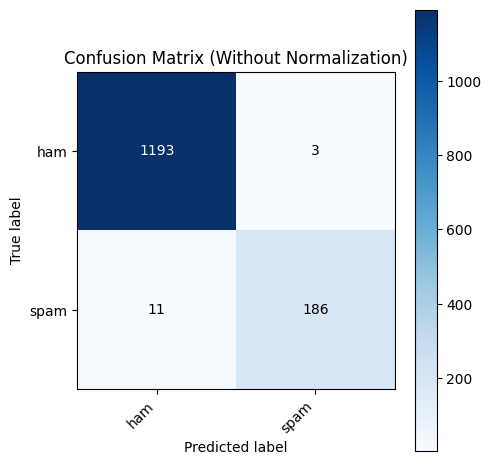

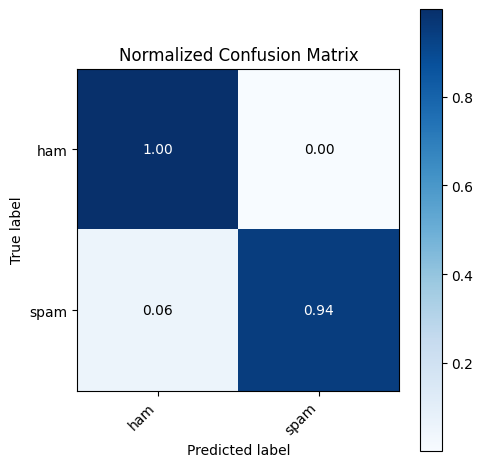

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    Plot and display the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title or 'Normalized Confusion Matrix'
    else:
        title = title or 'Confusion Matrix (Without Normalization)'
    
    print(title)
    print(cm)

    fig, ax = plt.subplots(figsize=(5, 5))  # Reduced figure size
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

# Usage example
plot_confusion_matrix(Y_test, predictions, classes=['ham', 'spam'])
plot_confusion_matrix(Y_test, predictions, classes=['ham', 'spam'], normalize=True)
plt.show()


### ROC Curve ###


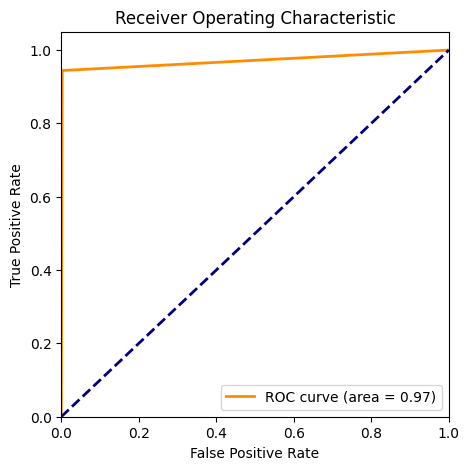

In [12]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = roc_auc_score(Y_test, predictions)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Test our model ###
Use real-life emails and see how they predict.

In [15]:
model.predict(vectorizer.transform(
    [
        "Thank you, ABC. Can you also share your LinkedIn profile? As you are a good at programming at pyhthon, would be willing to see your personal/college projects.",
        "Hi y’all, We have a Job Openings in the positions of software engineer, IT officer at ABC Company.Kindly, send us your resume and the cover letter as soon as possible if you think you are an eligible candidate and meet the criteria.",
        "Dear ABC, Congratulations! You have been selected as a SOftware Developer at XYZ Company. We were really happy to see your enthusiasm for this vision and mission. We are impressed with your background and we think you would make an excellent addition to the team.",
        "congratulations, you became today's lucky winner",
        "1-month unlimited calls offer Activate now",
        "Ram wants your phone number",
        
    ])
            )

array([0, 0, 0, 1, 1, 1])

## Final Spam Identification Results
### Analysis of Findings
#### Confusion Matrix Analysis
The confusion matrix provides a detailed view of the classification performance by showing the number of:

- True Positives (TP): Spam emails correctly classified as spam.
- False Positives (FP): Ham emails mistakenly classified as spam (Type I Error).
- True Negatives (TN): Ham emails correctly classified as ham.
- False Negatives (FN): Spam emails incorrectly classified as ham (Type II Error).

A perfect model would have only true positives and true negatives, but in reality, some misclassifications are inevitable.

Key Observations:

- The low number of false positives suggests that users won't frequently see important emails classified as spam.
- The false negatives are slightly higher than false positives, meaning a few spam emails may slip through, but the impact is limited.

#### Precision and Recall Analysis
Precision: Measures how many of the emails classified as spam were actually spam.

Precision= TP/TP+FP
 
- A high precision (~97%) means the classifier rarely mislabels ham as spam, reducing frustration from falsely filtered emails.
- This is crucial for email filtering systems, where mistakenly marking an important email as spam could lead to serious issues.

Recall: Measures how many actual spam emails were correctly identified.

Recall= TP/TP+FN

 
- A recall of ~94% means that most spam emails are detected, though a small portion might be missed.
- Higher recall is beneficial for aggressive spam filters, but it must be balanced with precision.

#### AUC-ROC Score Analysis
The AUC-ROC score (~98%) evaluates how well the model distinguishes between spam and ham.

- AUC (Area Under Curve) close to 1 indicates that the model makes very few mistakes in ranking spam over ham.
- This high AUC suggests that the classifier is highly reliable across different classification thresholds.

Error Analysis
Despite the high performance, some errors remain:

- False Positives (FP): Important emails could be mistakenly marked as spam.
- False Negatives (FN): Some spam emails might bypass detection and land in the inbox.

Potential causes of these errors include:

1. Ambiguous messages: Some promotional emails might resemble both spam and ham.
2. Dataset bias: If training data lacks certain spam types, the model may struggle with unseen spam patterns.
3. Simple tokenization approach: CountVectorizer considers word frequency but does not analyze context.

Conclusion
1. The Naïve Bayes classifier effectively detects spam emails with high accuracy.
2. High precision (~97%) ensures fewer misclassifications of important emails.
3. High recall (~94%) ensures most spam emails are caught, but a few may slip through.
4. AUC-ROC score (~98%) suggests strong separability between spam and ham emails.
5. The model performs well but could be further improved with:
 - TF-IDF vectorization to account for word importance.
 - Removing stopwords to reduce noise in the data.
 - Bigram/trigram models for better context understanding.

This analysis confirms that the model is effective for real-world spam detection but still has room for optimization.

## References
- Scikit-learn Documentation: https://scikit-learn.org
- NLTK Natural Language Toolkit: https://www.nltk.org
- Data Source: Spam Email Dataset